# Tranfer Learnning to Flower Recognition using PyTorch 🔥
This dataset contains labeled 4242 images of flowers. (There are 4317 images on the dataset).


### Content
The pictures are divided into five classes: chamomile, tulip, rose, sunflower, dandelion.

For each class there are about 800 photos. Photos are not high resolution, about 320x240 pixels. Photos are not reduced to a single size, they have different proportions!

## Data
You can download data from: [Flowers Recognition Dataset](https://www.kaggle.com/datasets/alxmamaev/flowers-recognition)

In [ ]:
import numpy as np
import pandas as pd
import os
path="./"
os.listdir(path)

['.config', 'flowers.zip', 'sample_data']

In [ ]:
!unzip flowers.zip

Archive:  flowers.zip
  inflating: flowers/daisy/100080576_f52e8ee070_n.jpg  
  inflating: flowers/daisy/10140303196_b88d3d6cec.jpg  
  inflating: flowers/daisy/10172379554_b296050f82_n.jpg  
  inflating: flowers/daisy/10172567486_2748826a8b.jpg  
  inflating: flowers/daisy/10172636503_21bededa75_n.jpg  
  inflating: flowers/daisy/102841525_bd6628ae3c.jpg  
  inflating: flowers/daisy/10300722094_28fa978807_n.jpg  
  inflating: flowers/daisy/1031799732_e7f4008c03.jpg  
  inflating: flowers/daisy/10391248763_1d16681106_n.jpg  
  inflating: flowers/daisy/10437754174_22ec990b77_m.jpg  
  inflating: flowers/daisy/10437770546_8bb6f7bdd3_m.jpg  
  inflating: flowers/daisy/10437929963_bc13eebe0c.jpg  
  inflating: flowers/daisy/10466290366_cc72e33532.jpg  
  inflating: flowers/daisy/10466558316_a7198b87e2.jpg  
  inflating: flowers/daisy/10555749515_13a12a026e.jpg  
  inflating: flowers/daisy/10555815624_dc211569b0.jpg  
  inflating: flowers/daisy/10555826524_423eb8bf71_n.jpg  
  inflating: fl

In [ ]:
path="./flowers"
os.listdir(path)

['rose', 'tulip', 'daisy', 'sunflower', 'dandelion']

In [ ]:
image_count = sum([len(files) for r, d, files in os.walk(path) if any(file.endswith(('.jpg', '.jpeg', '.png')) for file in files)])

print(f"Cantidad de imágenes: {image_count}")

Cantidad de imágenes: 4317


In [ ]:
classes=['dandelion', 'daisy', 'sunflower', 'tulip', 'rose']

In [ ]:
label_of_file=[]
img_list=[]

for kind in classes:
    kind_parh=os.path.join(path,kind)

    for img in os.listdir(kind_parh):
        img_list.append(os.path.join(kind_parh,img))
        label_of_file.append(kind)

df=pd.DataFrame({'img':img_list,'label':label_of_file})
df.head(3)
df = df.sample(frac=1).reset_index(drop=True)
df.head(2)

,img,label
0,./flowers/sunflower/9825716455_f12bcc8d4e_n.jpg,sunflower
1,./flowers/dandelion/34662979916_0479576f5e_n.jpg,dandelion


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

df['encode_label'] = encoder.fit_transform(df['label'])

In [ ]:
df.head(10)

,img,label,encode_label
0,./flowers/sunflower/9825716455_f12bcc8d4e_n.jpg,sunflower,3
1,./flowers/dandelion/34662979916_0479576f5e_n.jpg,dandelion,1
2,./flowers/sunflower/5139971615_434ff8ed8b_n.jpg,sunflower,3
3,./flowers/sunflower/5339004958_a0a6f385fd_m.jpg,sunflower,3
4,./flowers/rose/5001852517_6a8713ffe2_n.jpg,rose,2
5,./flowers/tulip/12764617214_12211c6a0c_m.jpg,tulip,4
6,./flowers/tulip/15147464747_594599c855_m.jpg,tulip,4
7,./flowers/rose/1757822526_fe30b9b3ca_m.jpg,rose,2
8,./flowers/sunflower/6140693467_211a135b6d.jpg,sunflower,3
9,./flowers/rose/3052753519_d087aaeacb_n.jpg,rose,2


In [ ]:
import cv2
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models

In [ ]:
example_img = cv2.imread(df['img'][2])
example_img.shape

(240, 320, 3)

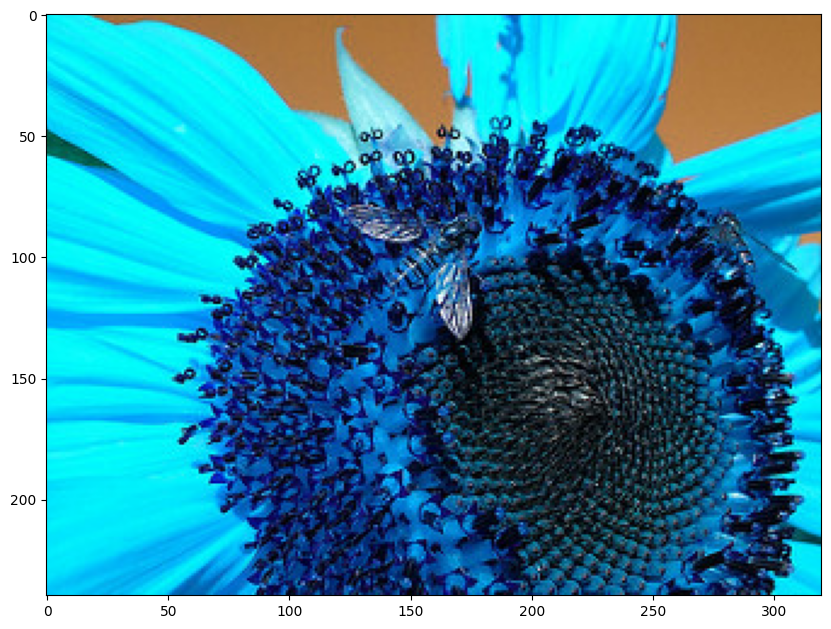

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(example_img)
plt.show()

In [ ]:
import numpy as np
x=[]
for img in df['img']:
    try:
        img = cv2.imread(img)
        img = cv2.resize(img, (224, 224))
        img = img / 255.0  # normalize
        x.append(img)      # img

    except:
        print(f"Error loading image: {img}")

## Modeling

In [ ]:
# using dataloader
X_train = DataLoader(x, batch_size=32, shuffle=True)
y_train = DataLoader(df['encode_label'], batch_size=32, shuffle=True)

In [ ]:
total_size = len(X_train.dataset)
print(f"Tamaño del conjunto de entrenamiento: {total_size}")

Tamaño del conjunto de entrenamiento: 4317


In [ ]:
total_size = len(y_train.dataset)
print(f"Tamaño del conjunto de entrenamiento: {total_size}")

Tamaño del conjunto de entrenamiento: 4317


In [ ]:
# make model
model = models.resnet50(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = torch.nn.Linear(num_ftrs, 5)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 191MB/s]


In [ ]:
# train Model
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [ ]:
# train model
def train_model(model, criterion, optimizer, num_epochs=25):
  model.train()
  # Cast the model weights to double precision (float64)
  model = model.double()
  for epoch in range(num_epochs):
    running_loss = 0.0
    for inputs, labels in zip(X_train, y_train):
      optimizer.zero_grad()
      # Permute the dimensions of the input tensor
      inputs = inputs.permute(0, 3, 1, 2) # Change the order of dimensions from [batch_size, height, width, channels] to [batch_size, channels, height, width]
      # Cast the inputs to double precision (float64)
      inputs = inputs.double()
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()
      running_loss += loss.item() * inputs.size(0)
      print(f"Epoch {epoch+1}/{num_epochs} Loss: {running_loss/len(X_train)}")

In [ ]:
# Test Model
def test_model(model):
  model.eval()
  test_loss = 0.0
  correct = 0
  with torch.no_grad():
    for inputs, labels in zip(X_train, y_train):
      # Permute the dimensions of the input tensor
      inputs = inputs.permute(0, 3, 1, 2) # Change the order of dimensions from [batch_size, height, width, channels] to [batch_size, channels, height, width]
      outputs = model(inputs)
      test_loss += criterion(outputs, labels).item() * inputs.size(0)
      pred = outputs.argmax(dim=1, keepdim=True)
      correct += pred.eq(labels.view_as(pred)).sum().item()
  test_loss /= len(X_train.dataset)
  test_accuracy = 100. * correct / len(X_train.dataset)
  print(f'Test set: Average loss: {test_loss:.4f}, Accuracy: {correct}/{len(X_train.dataset)} ({test_accuracy:.4f}%)')

In [ ]:
torch.cuda.is_available()

False

In [ ]:
# training
train_model(model, criterion, optimizer, num_epochs=25)

Epoch 1/25 Loss: 0.38617546400541
Epoch 1/25 Loss: 0.7679251769098576
Epoch 1/25 Loss: 1.1492969734331724
Epoch 1/25 Loss: 1.5214641147522356
Epoch 1/25 Loss: 1.9008767731030292
Epoch 1/25 Loss: 2.324980537014961
Epoch 1/25 Loss: 2.73017508343399
Epoch 1/25 Loss: 3.1513328683274406
Epoch 1/25 Loss: 3.5118814586690137
Epoch 1/25 Loss: 3.9146155952855963
Epoch 1/25 Loss: 4.308639899984156
Epoch 1/25 Loss: 4.686636915345475
Epoch 1/25 Loss: 5.063203540506592
Epoch 1/25 Loss: 5.44590699593508
Epoch 1/25 Loss: 5.837903926755313
Epoch 1/25 Loss: 6.243867564410501
Epoch 1/25 Loss: 6.665676677016895
Epoch 1/25 Loss: 7.057947638941047
Epoch 1/25 Loss: 7.4384919727058225
Epoch 1/25 Loss: 7.811680391920073
Epoch 1/25 Loss: 8.197499814898487
Epoch 1/25 Loss: 8.60438526099145
Epoch 1/25 Loss: 8.986783713773473
Epoch 1/25 Loss: 9.385882101548313
Epoch 1/25 Loss: 9.76437850469297
Epoch 1/25 Loss: 10.146615877154016
Epoch 1/25 Loss: 10.550011648101306
Epoch 1/25 Loss: 10.925807161916909
Epoch 1/25 Los